LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64
   LOCATION      USD_CAP
41      USA  1181.228364
26      JPN   817.954400
12      DEU   813.593455
5       CAN   805.740636
17      FRA   688.928545


C:\Users\kaurp\AppData\Local\Temp\ipykernel_16360\482853788.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='USD_CAP', y='LOCATION', palette=['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f',


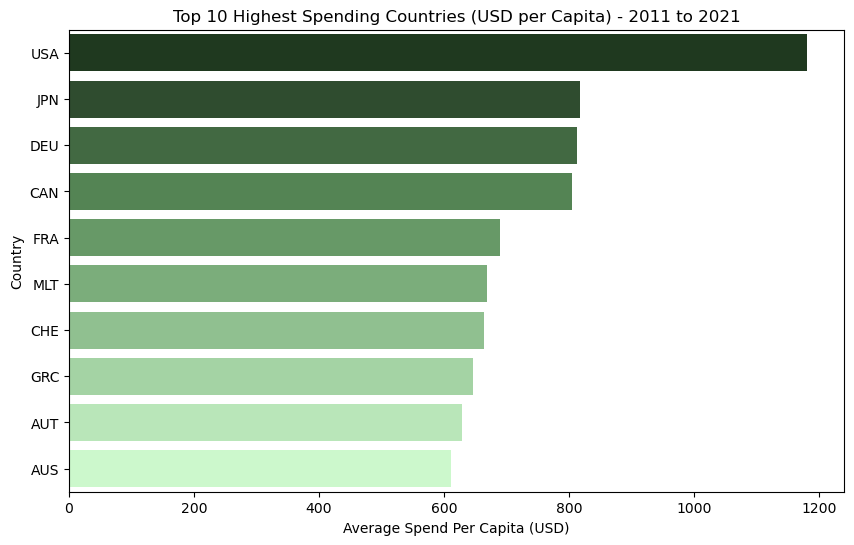

C:\Users\kaurp\AppData\Local\Temp\ipykernel_16360\482853788.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, x='USD_CAP', y='LOCATION', palette=['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f',


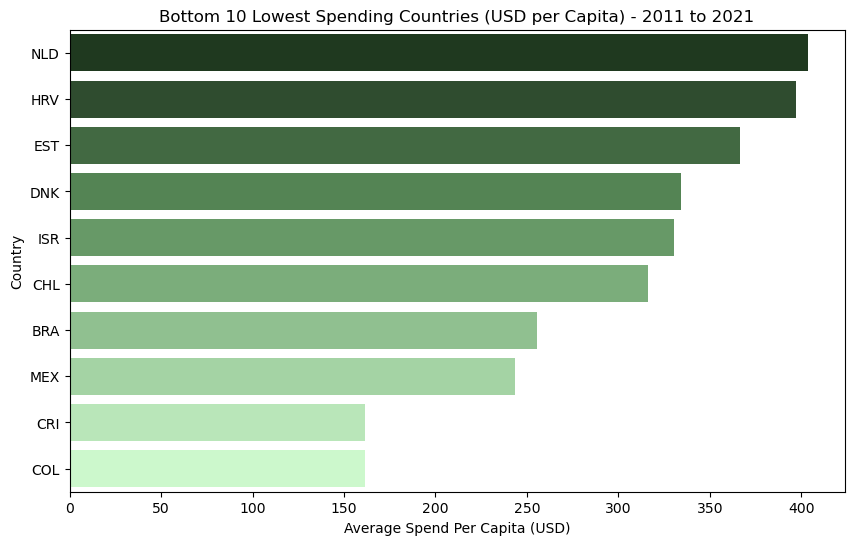

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Filter data for years 2011 to 2021
data_filtered = data[(data['TIME'] >= 2011) & (data['TIME'] <= 2021)]

# Check for missing values
print(data_filtered.isnull().sum())  # Ensure there are no missing values in the relevant columns

# Calculate Average Spend Per Capita by Location for the filtered years
avg_spend = data_filtered.groupby('LOCATION')['USD_CAP'].mean().reset_index()
avg_spend = avg_spend.sort_values(by='USD_CAP', ascending=False)

# Check the grouped data
print(avg_spend.head())  # Ensure the data looks as expected

# Top 10 and Bottom 10 Countries
top_10 = avg_spend.head(10)
bottom_10 = avg_spend.tail(10)

# Bar Chart for Top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='USD_CAP', y='LOCATION', palette=['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f', 
                                                             '#73b573', '#88c888', '#9cdb9c', '#b1eeb1', '#c5ffc5'])
plt.title('Top 10 Highest Spending Countries (USD per Capita) - 2011 to 2021')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Bar Chart for Bottom 10
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10, x='USD_CAP', y='LOCATION', palette=['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f', 
                                                                '#73b573', '#88c888', '#9cdb9c', '#b1eeb1', '#c5ffc5'])
plt.title('Bottom 10 Lowest Spending Countries (USD per Capita) - 2011 to 2021')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()


# Pharmaceutical Spenders Per Capita: Graph 1 & 2
Data Aggregation: The data shows the top 10 countries based on USD per capita pharmaceutical spending (not total spending). The values are averaged across the selected years(2011-2021)
Visualization: A horizontal bar chart is used to show the spending values for each country. The x-axis represents the average spending per capita in USD, while the y-axis displays the country names. The graph includes interactive hover features that reveal precise spending values.

# Top 10 Pharmaceutical Spenders Per Capita: Graph 1
Key Observations: The USA leads significantly, with the highest per capita spending
Other high spenders include: 
     Malta (MLT) → A comparatively smaller economy country with high per capita spending.
     Switzerland (CHE) → Known for its robust healthcare system.
     France (FRA) → Major European economy with steady healthcare investments.

# Bottom 10 Pharmaceutical Spenders Per Capita: Graph 2
Key Observations: Gradual Increase: The spending increases gradually from the bottom to the top of the list, with the last country on the list having the highest spending among these ten, approaching 400 USD.
The list includes a mix of countries from different regions, such as Europe (Croatia, Estonia, Denmark), the Middle East (Israel), and Latin America (Chile, Brazil, Mexico, Costa Rica, Colombia). This indicates that low spending per capita is not confined to one specific region but is a global issue.

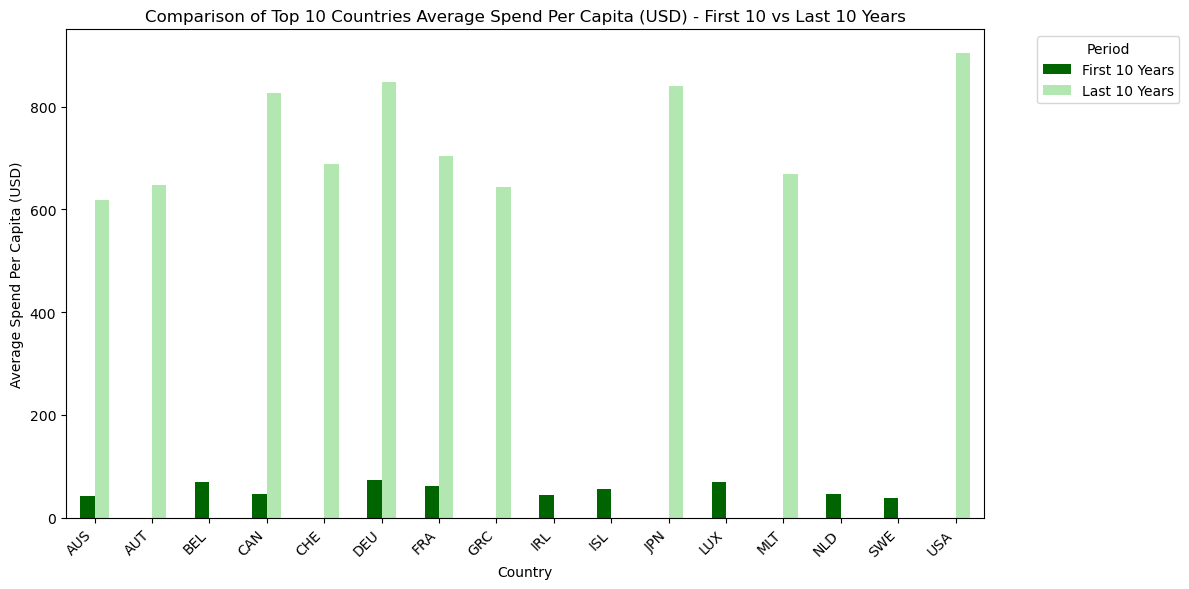

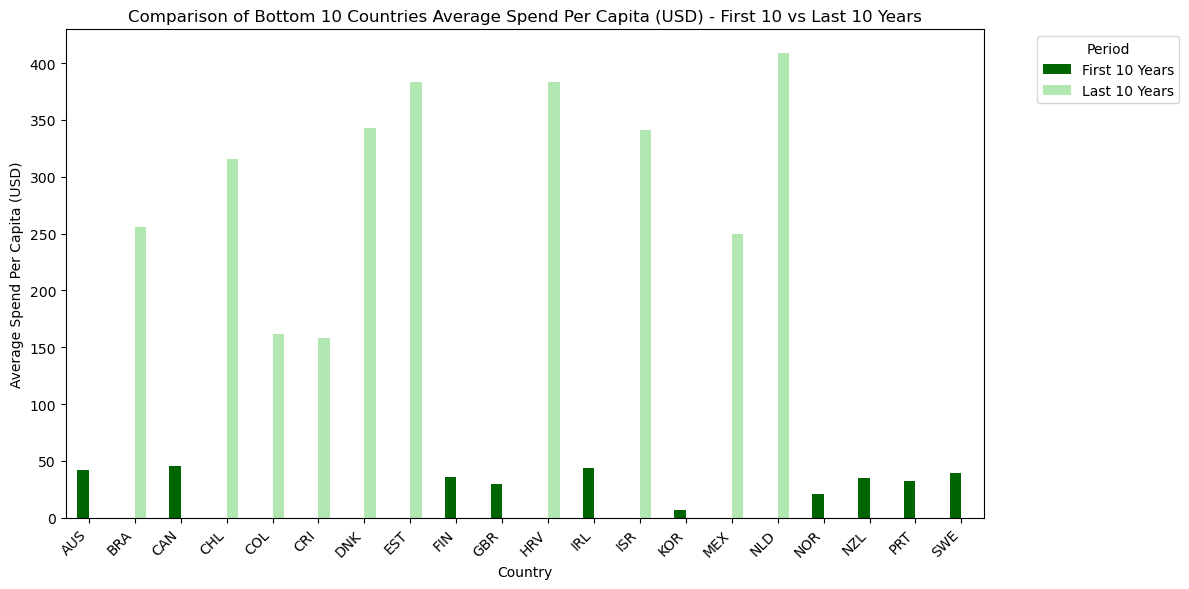

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Divide into first 10 years and last 10 years
first_10_years = data[data['TIME'].between(data['TIME'].min(), data['TIME'].min() + 9)]
last_10_years = data[data['TIME'].between(data['TIME'].max() - 9, data['TIME'].max())]

# Group by LOCATION and calculate average USD_CAP for each period
first_avg_spend = first_10_years.groupby('LOCATION')['USD_CAP'].mean().reset_index()
last_avg_spend = last_10_years.groupby('LOCATION')['USD_CAP'].mean().reset_index()

# Detect and Handle Outliers
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

first_avg_spend = handle_outliers(first_avg_spend, 'USD_CAP')
last_avg_spend = handle_outliers(last_avg_spend, 'USD_CAP')

# Rank Top 10 and Bottom 10
first_top_10 = first_avg_spend.nlargest(10, 'USD_CAP')
first_bottom_10 = first_avg_spend.nsmallest(10, 'USD_CAP')

last_top_10 = last_avg_spend.nlargest(10, 'USD_CAP')
last_bottom_10 = last_avg_spend.nsmallest(10, 'USD_CAP')

# Combine data for grouped bar chart comparison
top_10_combined = pd.concat([
    first_top_10[['LOCATION', 'USD_CAP']].assign(Period='First 10 Years'),
    last_top_10[['LOCATION', 'USD_CAP']].assign(Period='Last 10 Years')
])

bottom_10_combined = pd.concat([
    first_bottom_10[['LOCATION', 'USD_CAP']].assign(Period='First 10 Years'),
    last_bottom_10[['LOCATION', 'USD_CAP']].assign(Period='Last 10 Years')
])

# Plot Grouped Bar Chart for Top 10 Countries
plt.figure(figsize=(12, 6))
top_10_combined_pivot = top_10_combined.pivot(index='LOCATION', columns='Period', values='USD_CAP')
top_10_combined_pivot.plot(kind='bar', ax=plt.gca(), color=['#006400', '#b2e7b2'])  # Same color scheme as Bottom 10

plt.title('Comparison of Top 10 Countries Average Spend Per Capita (USD) - First 10 vs Last 10 Years')
plt.xlabel('Country')
plt.ylabel('Average Spend Per Capita (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Grouped Bar Chart for Bottom 10 Countries
plt.figure(figsize=(12, 6))
bottom_10_combined_pivot = bottom_10_combined.pivot(index='LOCATION', columns='Period', values='USD_CAP')
bottom_10_combined_pivot.plot(kind='bar', ax=plt.gca(), color=['#006400', '#b2e7b2'])  # Consistent color scheme

plt.title('Comparison of Bottom 10 Countries Average Spend Per Capita (USD) - First 10 vs Last 10 Years')
plt.xlabel('Country')
plt.ylabel('Average Spend Per Capita (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Top 10 vs Bottom 10 Spenders – First 10 Years vs Last 10 Years
Data Preparation: The dataset is divided into two periods: the First 10 Years (earliest years) and the Last 10 Years (most recent years). The data is grouped by country (LOCATION), and the average spending per capita (USD_CAP) is calculated for each period. Outliers are handled using the Interquartile Range (IQR) method, capping values outside the lower and upper bounds.

Visualization: Four bar charts are created to compare the Top 10 and Bottom 10 spenders in both the First and Last 10 years. These charts highlight spending trends over time, using consistent color coding for both periods.

Key Observations: 
 Increased Spending Over Time: The top 10 spenders in the last 10 years show higher spending per capita compared to the first 10 years, indicating increased pharmaceutical investment. This suggests rising drug costs or improved healthcare access over time.
 Top & Bottom 10 Consistency:The top 10 spenders show some consistency, with four countries (Australia, Germany, France, and Canada) appearing in both periods.There is no overlap in the bottom 10 spenders, confirming that the lowest-spending countries vary significantly between the two periods. So it could be due to changing economic factors or changing healthcare investments in low spending countries 
 Rising Pharmaceutical Costs Over Time: The last 10 years show generally higher average spending for both top and bottom spenders compared to the first 10 years, indicating inflation or increased healthcare investment over time.

In [16]:
from scipy.stats import zscore

# Compute Z-scores
data['Z_Score'] = zscore(data['USD_CAP'])  # Replace 'USD_CAP' with your desired column
outliers = data[(data['Z_Score'] > 3) | (data['Z_Score'] < -3)]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score
335       DEU  2021       13.866   1.793  1042.460     86728.58  3.114828
1332      USA  2013       11.975   1.915  1020.541    322552.13  3.017873
1333      USA  2014       12.527   2.029  1118.634    356157.77  3.451771
1334      USA  2015       12.707   2.095  1189.437    381498.83  3.764956
1335      USA  2016       12.263   2.060  1192.301    385198.78  3.777624
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259


# Z Score to identify Outliers:
The code calculates Z-scores for the 'USD_CAP' column and identifies outliers where the Z-score is above 3 or below -3.
zscore() computes how far each value is from the mean in terms of standard deviations. Outliers are selected if their Z-scores are greater than 3 or less than -3.
Key Observations: Z-Scores: All the rows listed have Z-scores above 3, indicating they are outliers (values significantly higher than the mean) 
These rows represent countries (like the USA) with exceptionally high USD capital expenditures relative to the dataset relative to the dataset's mean and standard deviation.

In [17]:
Q1 = data['USD_CAP'].quantile(0.25)  # Replace 'USD_CAP' with your column
Q3 = data['USD_CAP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['USD_CAP'] < lower_bound) | (data['USD_CAP'] > upper_bound)]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score
335       DEU  2021       13.866   1.793  1042.460     86728.58  3.114828
1333      USA  2014       12.527   2.029  1118.634    356157.77  3.451771
1334      USA  2015       12.707   2.095  1189.437    381498.83  3.764956
1335      USA  2016       12.263   2.060  1192.301    385198.78  3.777624
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259


# Interquartile Range (IQR) method to identify outliers:
Quantiles: Q1 (25th percentile) and Q3 (75th percentile) are computed.
IQR Calculation: IQR = Q3 - Q1, representing the spread of the middle 50% of the data
Outlier Bounds: Outliers are values outside the range defined by 1.5 * IQR below Q1 or above Q3. Rows with values outside these bounds are filtered and displayed.
Key Observations: 
Predicted Values: These are calculated based on model, offering estimates of 'USD_CAP'.
Comparison: The predicted values seem lower than the actual 'USD_CAP' values in most cases, suggesting potential underestimation by the model.

In [18]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
model = IsolationForest(contamination=0.05)  # 5% of data as outliers
data['Anomaly'] = model.fit_predict(data[['USD_CAP', 'PC_GDP']])  # Include relevant columns
outliers = data[data['Anomaly'] == -1]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score  \
129       BGR  2003       37.000   2.664   231.652      1801.17 -0.471644   
130       BGR  2004       35.617   2.454   233.474      1801.69 -0.463585   
131       BGR  2005       34.274   2.362   243.791      1867.19 -0.417949   
132       BGR  2006       36.808   2.402   267.287      2031.65 -0.314018   
135       BGR  2012       37.745   2.846   474.182      3464.32  0.601147   
...       ...   ...          ...     ...       ...          ...       ...   
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081   
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133   
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418   
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327   
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259   

      Anomaly  
129        -1  
130        -1  
131        -1  
132        

This code creates an IsolationForest model & sets the contamination parameter to 0.05, meaning the model will assume that 5% of the data are outliers. This helps the model focus on detecting those outlier. fit_predict fits the Isolation Forest model to the specified features (USD_CAP and PC_GDP in this case) and predicts whether each data point is an anomaly (-1) or not (1) and adding  new column 'Anomaly' to the dataset, with values of -1 indicating an outlier and 1 indicating a normal point. It filters the dataset to select the rows where the 'Anomaly' column is -1, which corresponds to outliers detected by the model.

Key Observations: 
 Outlier Identification: The rows with Anomaly = -1 show the detected outliers. These points can be anomalies based on USD_CAP and PC_GDP values.
 Z-Scores: These outliers tend to have extreme Z-scores, indicating that they are far from the mean.
 This is useful for identifying unusual or extreme cases in the dataset that could distort analysis and predictive models.

Outliers detected:
     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND
335       DEU  2021       13.866   1.793  1042.460     86728.58
1333      USA  2014       12.527   2.029  1118.634    356157.77
1334      USA  2015       12.707   2.095  1189.437    381498.83
1335      USA  2016       12.263   2.060  1192.301    385198.78
1336      USA  2017       11.954   2.004  1200.769    390396.57
1337      USA  2018       11.766   1.957  1229.266    401771.09
1338      USA  2019       11.767   1.961  1277.032    419287.86
1339      USA  2020       11.037   2.070  1315.218    436030.19
1340      USA  2021       11.743   2.039  1432.309    475596.74


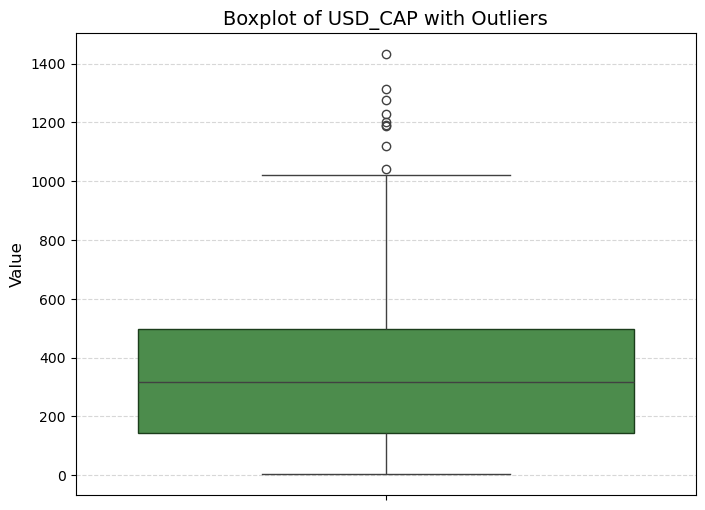

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Detect Outliers Using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify Outliers
outliers = detect_outliers_iqr(data, 'USD_CAP')  # Replace 'USD_CAP' with your desired column
print("Outliers detected:")
print(outliers)

# Visualization - Boxplot with consistent green color scheme
plt.figure(figsize=(8, 6))
box_color = '#4c8c4c'   # Mid-tone green for box fill
border_color = '#1b3d1b'  # Dark green for edges
whisker_color = '#2a512a'  # Complementary green for whiskers
median_color = '#88c888'   # Lighter green for median line

# Create the boxplot
box = sns.boxplot(data=data, y='USD_CAP', color=box_color)

# Customize elements
for patch in box.patches:
    patch.set_facecolor(box_color)
    patch.set_edgecolor(border_color)

# Styling
plt.title('Boxplot of USD_CAP with Outliers', fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Subtle gridlines
plt.show()

# Calculate the average of both variables for each country
average_data = data.groupby('LOCATION')[['PC_GDP', 'USD_CAP']].mean().reset_index()


We are using the detect_outliers_iqr to computes the IQR for the specified column (USD_CAP in this case). Outliers are identified as data points falling outside the range defined by 1.5 * IQR from the Q1 (25th percentile) and Q3 (75th percentile). The function returns the rows that are outliers based on the IQR method. The outliers variable stores the rows in data where the USD_CAP values fall outside the IQR range. This identifies data points that deviate significantly from the norm, ensuring accurate analysis by eliminating skewed results.
For Visualization, A boxplot is plotted to show the distribution of the USD_CAP values. The boxplot helps to visualize the spread, median, and any potential outliers in the USD_CAP data and also scatter plot is created to visualize the relationship between PC_GDP (x-axis) and USD_CAP (y-axis). The regular data points are shown in the scatter plot, while the detected outliers are highlighted in red.

Key Observations: 
Boxplot of USD_CAP with Outliers:
 Min and Lower Fence: 3.628, suggesting potential outliers below this value.
 Q1: Q1 is 144.52, which represents the 25th percentile of the data, indicating that 25% of the values fall below this threshold.
 Median: The median is 317.795, meaning that 50% of the values lie below this point, closer to Q1, indicating a slight lower skew
 Third Quartile (Q3): Q3 is 496.96, which means 75% of the values lie below this threshold. The interquartile range (IQR) is Q3 - Q1 = 352.44, indicating the spread of the middle 50% of the data.
 Upper Fence: The upper fence is 1020.541, which is the threshold for identifying high outliers. Values above this value are considered extreme.


Outliers based on Averages:
   LOCATION    PC_GDP     USD_CAP
3       BGR  2.554688  461.348063
43      USA  1.597714  730.073429


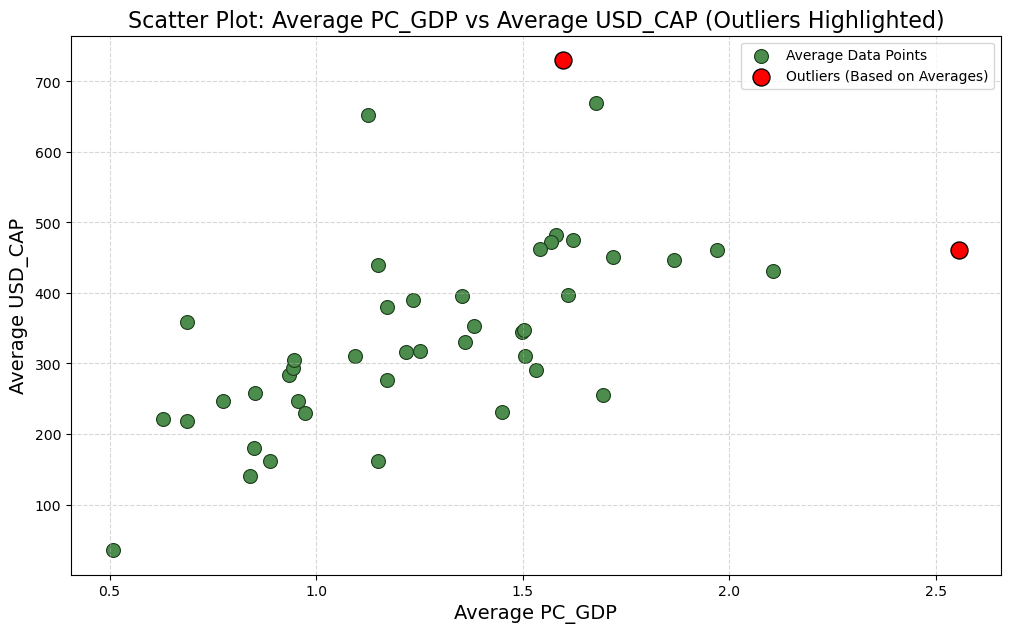

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# ---- 1. Calculate Average USD_CAP and PC_GDP per Country ----
average_data = data.groupby('LOCATION')[['PC_GDP', 'USD_CAP']].mean().reset_index()

# ---- 2. Detect Outliers Using IQR on Averages ----
def detect_outliers_iqr(df, columns):
    """Detects outliers using IQR for multiple columns."""
    outliers = pd.DataFrame()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outliers for the current column
        outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])
    
    # Remove duplicates
    outliers = outliers.drop_duplicates()
    return outliers

# Apply outlier detection on the averaged data
outliers_avg = detect_outliers_iqr(average_data, ['PC_GDP', 'USD_CAP'])

# Display Outliers
print("\nOutliers based on Averages:")
print(outliers_avg)

# ---- 3. Scatter Plot of Averages with Outliers Highlighted ----
plt.figure(figsize=(12, 7))

# Plot normal points in green
sns.scatterplot(x=average_data['PC_GDP'], y=average_data['USD_CAP'], 
                label='Average Data Points', color='#4c8c4c', edgecolor='#1b3d1b', s=100)

# Plot outliers in red
sns.scatterplot(x=outliers_avg['PC_GDP'], y=outliers_avg['USD_CAP'], 
                label='Outliers (Based on Averages)', color='red', edgecolor='black', s=150)

# Styling
plt.title('Scatter Plot: Average PC_GDP vs Average USD_CAP (Outliers Highlighted)', fontsize=16)
plt.xlabel('Average PC_GDP', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Key Observations:
The USA shows exceptionally high pharmaceutical spending per capita (~730 USD) despite a low GDP percentage (~1.6%), indicating disproportionate spending and BGR (Bulgaria) exhibits significantly low spending (~461 USD),despite allocating ~2.5% of its GDP, making it an outlier on the lower end.
BY examining the scatter plot, most of the data points form an upward-sloping pattern, as GDP% increases, pharmaceutical spending per capita generally rises, indicating a positive correlation.